## 참고사이트

+ http://matplotlib.org
+ http://seaborn.pydata.org

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore")

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mpl
mpl.rcParams["axes.unicode_minus"] = False

## 1. 선 그래프

<AxesSubplot:>

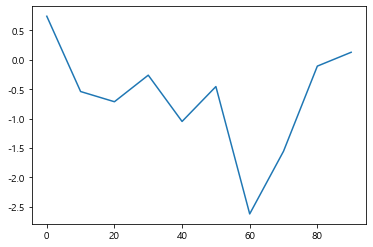

In [28]:
s = pd.Series(np.random.randn(10), index=np.arange(0, 100, 10))
s

s.plot()

<AxesSubplot:>

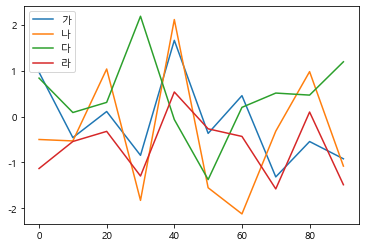

In [29]:
df1 = pd.DataFrame(np.random.randn(10,4), columns=["가", "나", "다", "라"],
                  index = np.arange(0, 100, 10))
df1

df1.plot()

## 2. 막대 그래프

<AxesSubplot:>

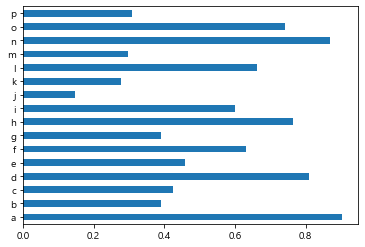

In [44]:
s2 = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
s2

# s2.plot(kind="bar")
# s2.plot.bar()

s2.plot(kind="barh")

<AxesSubplot:>

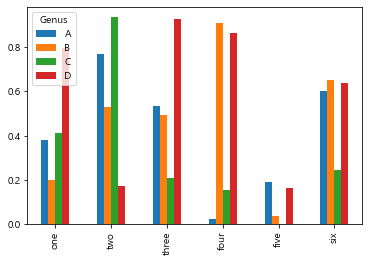

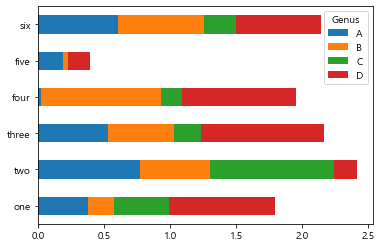

In [41]:
df2 = pd.DataFrame(np.random.rand(6, 4), index=["one", "two", "three", "four", "five", "six"],
                  columns = pd.Index(["A", "B", "C", "D"], name="Genus"))
df2.plot(kind="bar")
df2.plot(kind="barh", stacked=True)

## 3. Histogram

+ X변수가 가질 수 있는 값의 범위
+ 값만 필요하고 인덱스가 필요없다.

<AxesSubplot:>

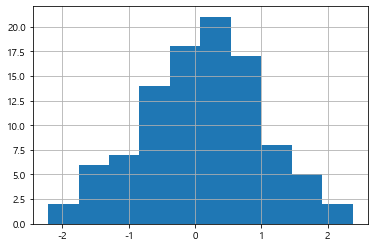

In [48]:
s = pd.Series(np.random.normal(0, 1, size=100))
s

s.hist()

<AxesSubplot:>

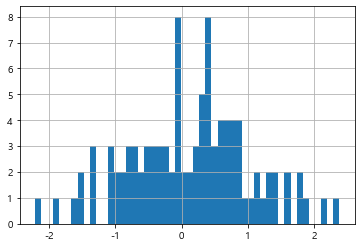

In [49]:
s.hist(bins=50)

In [60]:
s = pd.Series([200, 300, 400, 500, 600, 700 , 900, 1000, 11999])
s[(s>500) & (s<1000)]

4    600
5    700
6    900
dtype: int64

## 4. 산점도 (scatter plot)

+ 두 변수의 관계를 확인 : 양, 음, 0

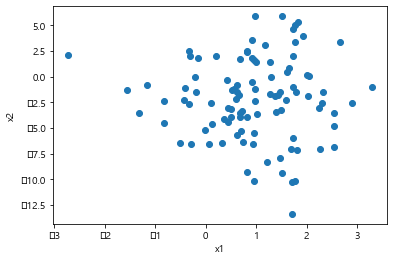

In [7]:
x1 = np.random.normal(1, 1, size=(100, 1))
x1

x2 = np.random.normal(-2, 4, size=(100, 1))
x2

x = np.concatenate((x1, x2), axis=1)
x

df = pd.DataFrame(x, columns=["x1", "x2"])
df

df.plot.scatter("x1","x2")
plt.scatter(df["x1"],df["x2"])

## 5. 상자 그래프 (box plot)

<AxesSubplot:>

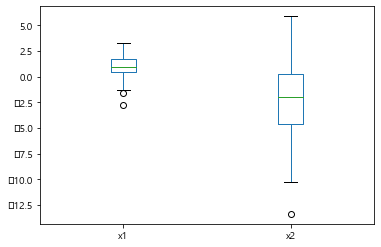

In [8]:
df.plot.box()

## 6. 활용 예제1

+ seaborn의 tips 샘플

### (1) 데이터 불러오기

In [10]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### (2) total_bill에 대한 금액 분포 확인

Text(0, 0.5, 'frequency')

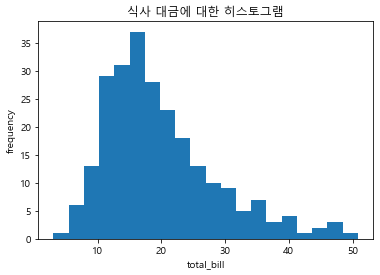

In [16]:
# tips["total_bill"].hist()

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) # 1,1 그래프의 위치 1 그래프의 순서

ax.hist(tips["total_bill"], bins=20)
ax.set_title("식사 대금에 대한 히스토그램")
ax.set_xlabel("total_bill")
ax.set_ylabel("frequency")

### (2) total_bill과 tip의 관계를 알고싶다.

Text(0, 0.5, 'tip')

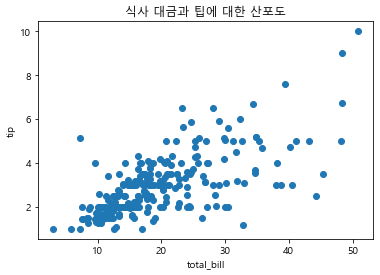

In [18]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) # 1,1 그래프의 위치 1 그래프의 순서

ax.scatter(tips["total_bill"], tips["tip"])
ax.set_title("식사 대금과 팁에 대한 산포도")
ax.set_xlabel("total_bill")
ax.set_ylabel("tip")

### (3) 성별에 따른 total_bill과 tip의 관계를 알고싶다.

Text(0, 0.5, 'tip')

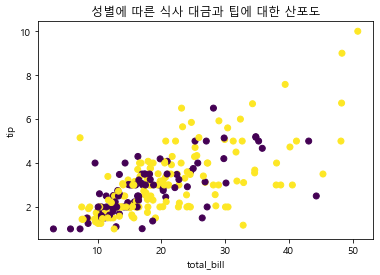

In [22]:
def record_sex(sex):
    if sex == "Female":
        return 0
    else :
        return 1

tips["sex_color"] = tips["sex"].apply(record_sex)
tips.head()

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(tips["total_bill"], tips["tip"], c=tips["sex_color"])
ax.set_title("성별에 따른 식사 대금과 팁에 대한 산포도")
ax.set_xlabel("total_bill")
ax.set_ylabel("tip")

### (4) 성별과 인원수에 따른 total_bill과 tip의 관계를 알고 싶다.

Text(0, 0.5, 'tip')

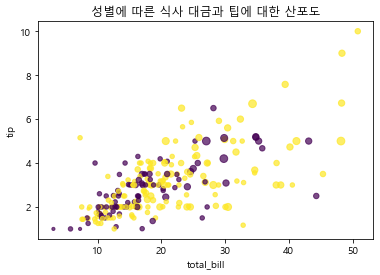

In [24]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(tips["total_bill"], tips["tip"], c=tips["sex_color"], alpha=0.7, 
          s=tips["size"]*10)
ax.set_title("성별에 따른 식사 대금과 팁에 대한 산포도")
ax.set_xlabel("total_bill")
ax.set_ylabel("tip")

### (5) 성별과 팁의 관계

Text(0, 0.5, 'tip')

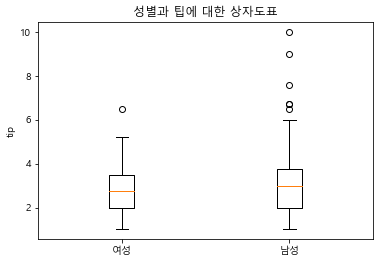

In [25]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.boxplot([tips[tips["sex"]=="Female"]["tip"], tips[tips["sex"]=="Male"]["tip"]],
          labels = ["여성", "남성"])
ax.set_title("성별과 팁에 대한 상자도표")
ax.set_ylabel("tip")

## 7. 활용예제2

+ 전국 신규 민간아파트 분양가격 동향
+ https://data.go.kr/dataset/3035522/fileData.do ( 데이터 폐기됨 )

### (1) 데이터 준비

In [39]:
apt = pd.read_csv("data/20200331.csv", encoding="euc-kr")
apt

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879
...,...,...,...,...,...
4585,제주,전체,2020,3,3955
4586,제주,전용면적 60㎡이하,2020,3,4039
4587,제주,전용면적 60㎡초과 85㎡이하,2020,3,3962
4588,제주,전용면적 85㎡초과 102㎡이하,2020,3,NaN


In [40]:
##### column 이름을 영어로 변경하고 (city, size, year, month, price), price는 숫자로 변경
apt1 = apt

apt1.columns = ["city", "size", "year", "month", "price"]

apt1["price"] = pd.to_numeric(apt1["price"].str.strip()) # 공백을 제거하고 숫자로 변경
apt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4590 entries, 0 to 4589
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   city    4590 non-null   object 
 1   size    4590 non-null   object 
 2   year    4590 non-null   int64  
 3   month   4590 non-null   int64  
 4   price   4260 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 179.4+ KB


In [41]:
##### 서울만 선택해서 "전체" size만 확인
apt_sa = apt1[(apt1["city"]=="서울") & (apt1["size"]=="전체")]

# 조회하는 함수
apt1.query('(city=="서울") and (size=="전체")')

,city,size,year,month,price
0,서울,전체,2015,10,5841.0
85,서울,전체,2015,11,6050.0
170,서울,전체,2015,12,6041.0
255,서울,전체,2016,1,6108.0
340,서울,전체,2016,2,6111.0
425,서울,전체,2016,3,6173.0
510,서울,전체,2016,4,6241.0
595,서울,전체,2016,5,6264.0
680,서울,전체,2016,6,6208.0
765,서울,전체,2016,7,6254.0


In [43]:
##### city, size 컬럼 삭제하고 다중index로 (year, month) 조정 
apt_graph = apt_sa.drop(["city","size"],axis=1)

In [44]:
apt_graph.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 0 to 4505
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    54 non-null     int64  
 1   month   54 non-null     int64  
 2   price   54 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 1.7 KB


In [45]:
apt_graph = apt_graph.set_index(["year","month"])
apt_graph.head(10)

price
year month        
2015 10     5841.0
     11     6050.0
     12     6041.0
2016 1      6108.0
     2      6111.0
     3      6173.0
     4      6241.0
     5      6264.0
     6      6208.0
     7      6254.0

<AxesSubplot:xlabel='year,month'>

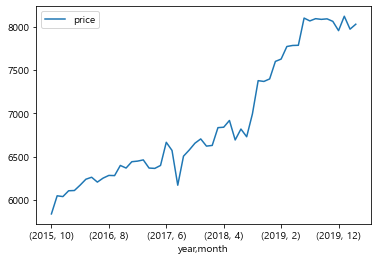

In [46]:
apt_graph.plot()

## 8. Seaborn 

In [47]:
tips = sns.load_dataset("tips")

Text(0, 0.5, 'frequency')

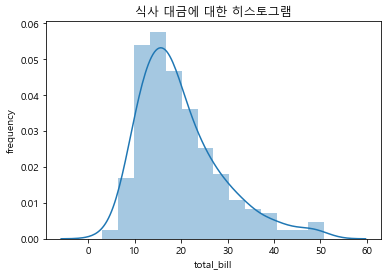

In [49]:
##### total_bill에 대한 금액 분포 확인

ax = sns.distplot(tips["total_bill"])

ax.set_title("식사 대금에 대한 히스토그램")
ax.set_xlabel("total_bill")
ax.set_ylabel("frequency")

Text(0, 0.5, 'frequency')

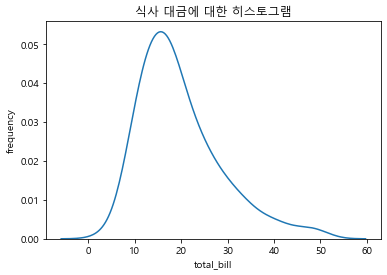

In [51]:
ax = sns.distplot(tips["total_bill"],hist=False)

ax.set_title("식사 대금에 대한 히스토그램")
ax.set_xlabel("total_bill")
ax.set_ylabel("frequency")

Text(0, 0.5, 'frequency')

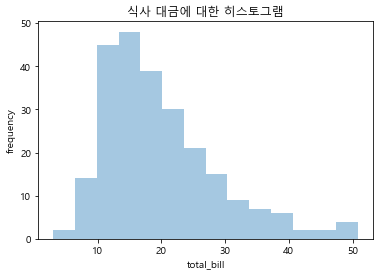

In [52]:
ax = sns.distplot(tips["total_bill"],kde=False)

ax.set_title("식사 대금에 대한 히스토그램")
ax.set_xlabel("total_bill")
ax.set_ylabel("frequency")

Text(0, 0.5, 'frequency')

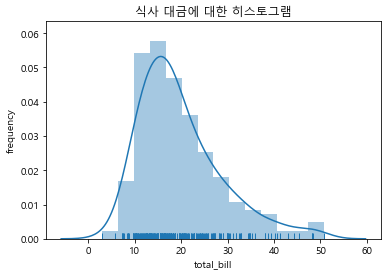

In [54]:
ax = sns.distplot(tips["total_bill"],rug=True) # 집중적으로 분포된 곳을 나타냄

ax.set_title("식사 대금에 대한 히스토그램")
ax.set_xlabel("total_bill")
ax.set_ylabel("frequency")

<AxesSubplot:xlabel='day', ylabel='count'>

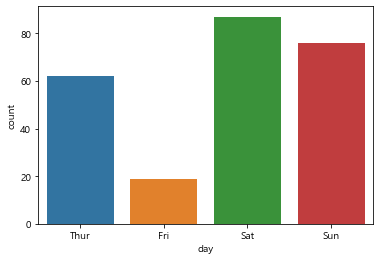

In [56]:
##### 요일별 빈도수 파악

sns.countplot("day", data=tips)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

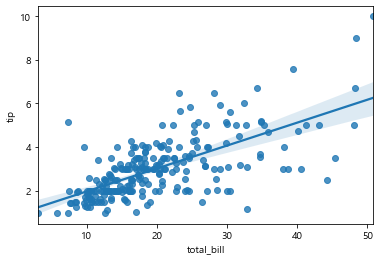

In [58]:
##### total_bill과 tip의 관계 (회귀분석)

sns.regplot(x="total_bill", y="tip", data=tips)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

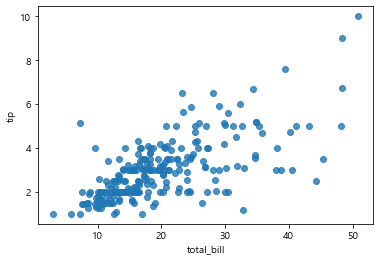

In [59]:
sns.regplot(x="total_bill", y="tip", data=tips, fit_reg=False) 

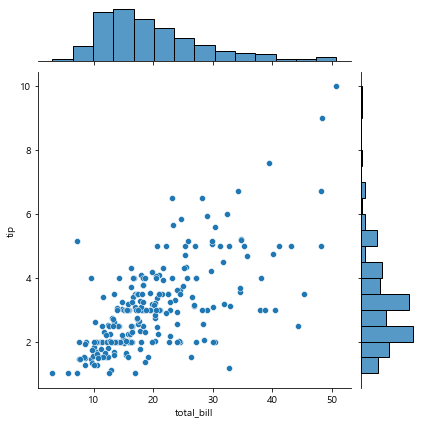

In [61]:
# 각 축의 히스토그램 + 산포도 

sns.jointplot(x="total_bill", y="tip", data=tips)

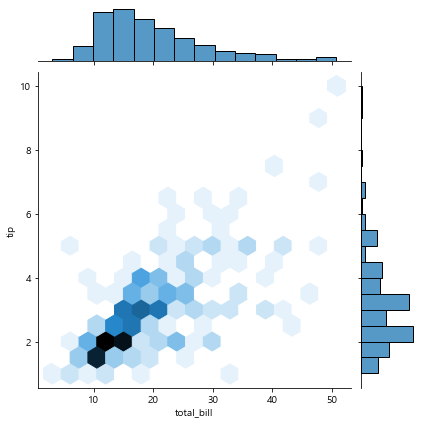

In [62]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="hex")

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

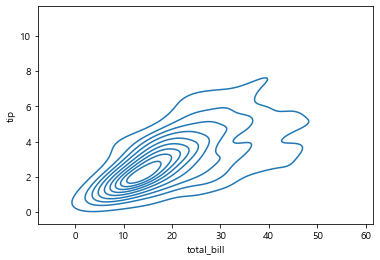

In [66]:
sns.kdeplot(x="total_bill", y="tip", data=tips)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

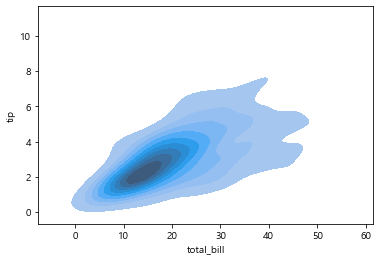

In [67]:
sns.kdeplot(x="total_bill", y="tip", data=tips, shade=True)

<AxesSubplot:xlabel='time', ylabel='total_bill'>

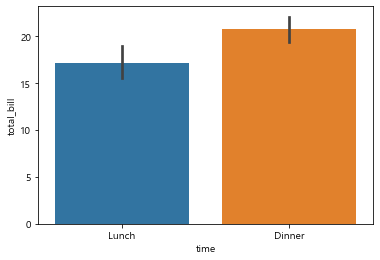

In [63]:
sns.barplot(x="time", y="total_bill", data=tips)

<AxesSubplot:xlabel='time', ylabel='total_bill'>

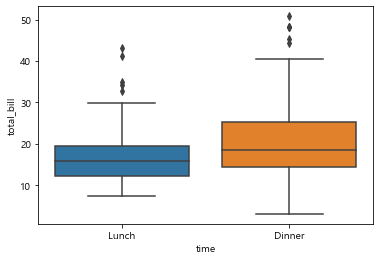

In [65]:
sns.boxplot(x="time", y="total_bill", data=tips)

<AxesSubplot:xlabel='time', ylabel='total_bill'>

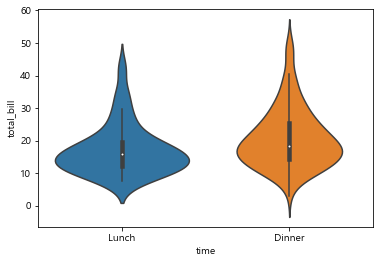

In [68]:
sns.violinplot(x="time", y="total_bill", data=tips)

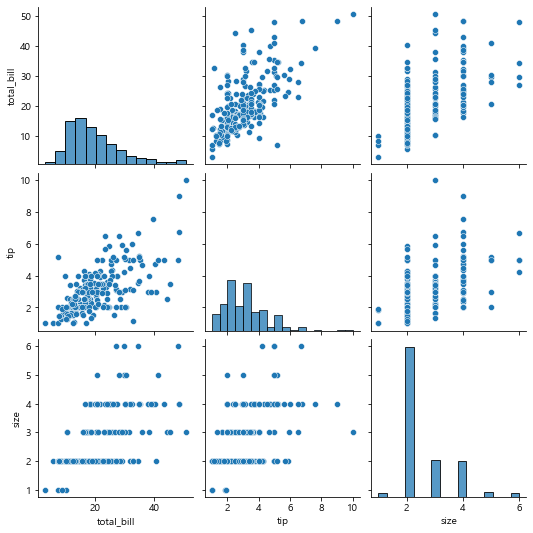

In [71]:
sns.pairplot(data=tips)

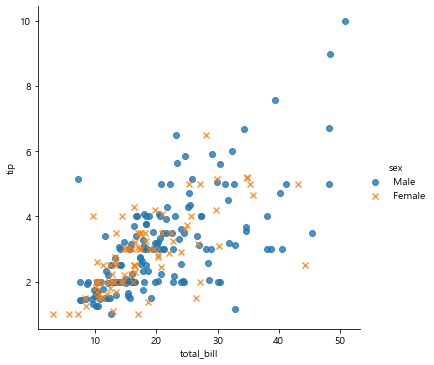

In [75]:
##### 성별에 따른 total_bill과 tip의 관계를 알고싶다.

sns.lmplot(x="total_bill", y="tip", data=tips, fit_reg=False, hue="sex", 
          markers=["o","x"])

## 9. 활용 예제3

+ 타이타닉 샘플 : http://www.kaggle.com/c/titanic

### (1) 데이터 준비

In [3]:
train = pd.read_csv("data/train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
##### 결측치 확인

train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### (2) EDA (Explorer Data Analysis)

In [6]:
def bar_chart(feature):
    survived = train[train["Survived"]==1][feature].value_counts()
    dead = train[train["Survived"]==0][feature].value_counts()
    
    df = pd.DataFrame([survived, dead])
    df.index = ["Survived", "Dead"]
    df.plot(kind="bar", stacked=True, figsize=(10,5))

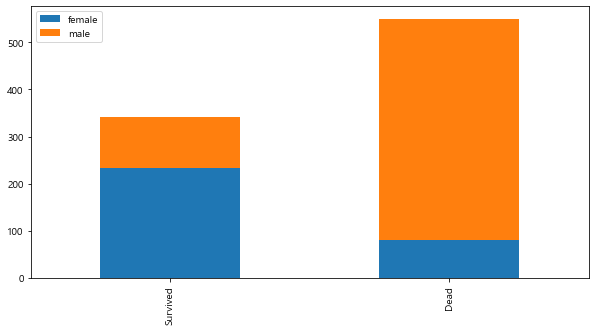

In [7]:
##### 성별에 따른 생존 여부
bar_chart("Sex")

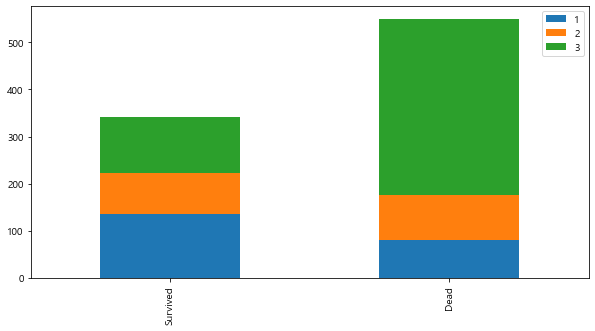

In [8]:
##### 객실등급에 따른 생존여부
bar_chart("Pclass")

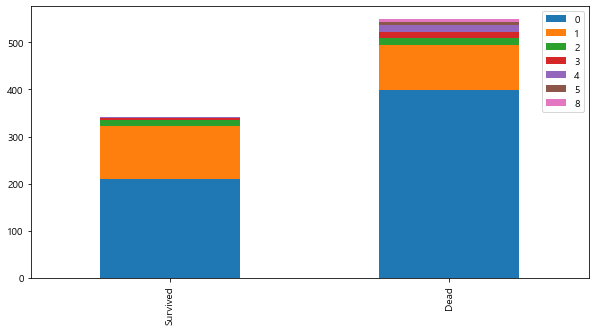

In [9]:
##### 동승(자매와 배우자) 여부에 따른 생존여부
bar_chart("SibSp")

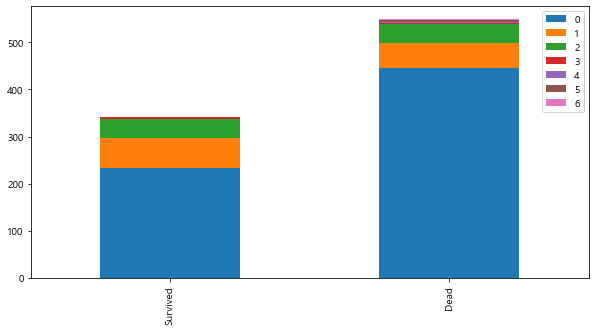

In [10]:
##### 동승(부모와 자식) 여부에 따른 생존여부
bar_chart("Parch")

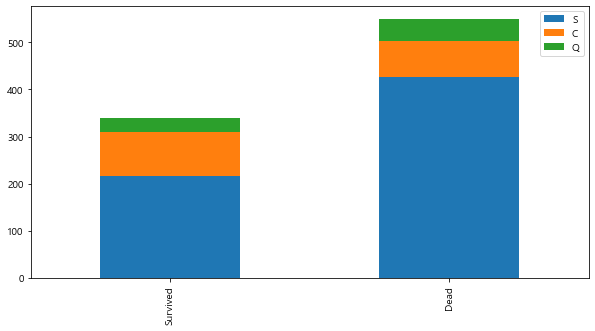

In [11]:
##### 정박지에 따른 생존여부
bar_chart("Embarked")

### (3) Feature Engineering

In [30]:
##### 이름에서 호칭에 대한 부분 추출하기

#train["Name"].str.extract(", (\w+).").value_counts()
#train["Name"].str.extract(", ([a-zA-Z]+).").value_counts()
train["title"] = train["Name"].str.extract(" ([A-Za-z]+)\.")

title_mapping = {"Mr":0, "Miss":1, "Mrs":2, "Master":3, "Dr":3, "Rev":3, "Major":3, "Mlle":3,
                "Col":3, "Sir":3, "Don":3, "Mme":3, "Lady":3, "Jonkheer":3, "Countess":3,
                "Capt":3, "Ms":3}
train["title"] = train["title"].map(title_mapping)
train["title"].value_counts()

0    517
1    182
2    125
3     67
Name: title, dtype: int64

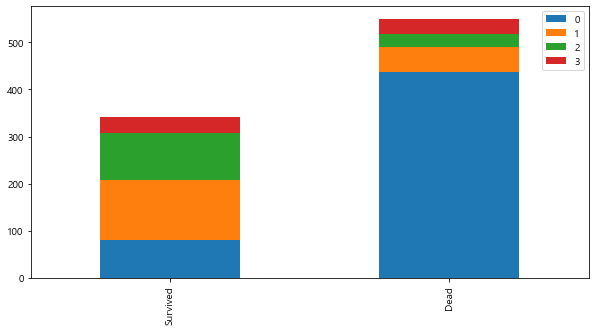

In [31]:
bar_chart("title")

In [35]:
##### Age 
# 결측치를 각 title의 age의 중앙값으로 대체 
# transform과 apply 차이
#  (1) transform()함수, 문자열 함수, 함수 목록 및 사전과 함께 작동합니다. 그러나 apply()기능과 함께 만 허용됩니다.
#  (2) transform()집계 된 결과를 생성 할 수 없습니다.
#  (3) apply()한 번에 여러 시리즈에서 작동합니다. 하지만 transform()한 번에 하나의 시리즈로만 작업 할 수 있습니다.

train["Age"].fillna(train.groupby("title")["Age"].transform("median"),inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  title        891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


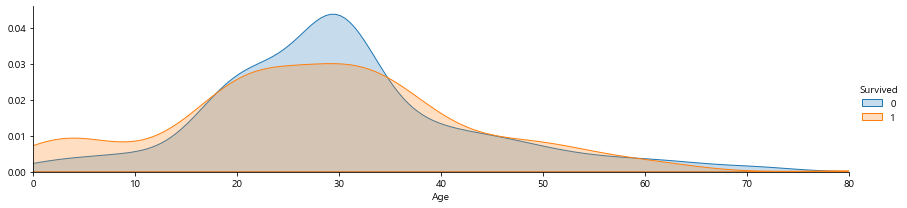

In [42]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4) # aspect = 너비/높이
facet.map(sns.kdeplot,"Age",shade=True)
facet.add_legend() # 범례추가
facet.set(xlim=(0, train["Age"].max())) # x축 범위

(20.0, 30.0)

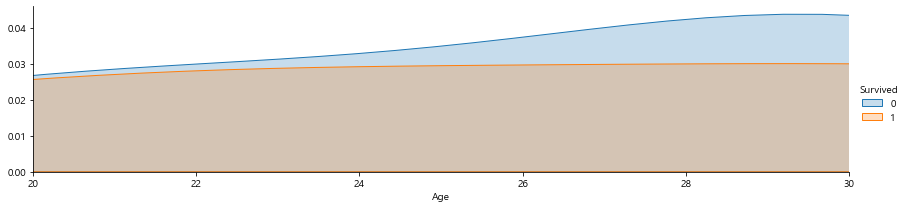

In [44]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4) 
facet.map(sns.kdeplot,"Age",shade=True)
facet.add_legend() # 범례추가
facet.set(xlim=(0, train["Age"].max())) 
# 특정 범위만 확대해서 보기
plt.xlim(20, 30)

---
## 10. 지도 시각화

+ pip install folium

In [46]:
!pip install folium

  Using cached folium-0.12.1-py2.py3-none-any.whl (94 kB)
  Using cached branca-0.4.2-py3-none-any.whl (24 kB)


In [47]:
import folium

In [51]:
folium.Map(location=[37.497963, 127.027518], zoom_start=15,tiles="Stamen Toner")

### (1) 미국 50개주의 실업률 표시 

In [52]:
state_unemp = pd.read_csv("data/map/folium_US_Unemployment_Oct2012.csv")
state_unemp.head()

,State,Unemployment
0,AL,7.1
1,AK,6.8
2,AZ,8.1
3,AR,7.2
4,CA,10.1


In [54]:
folium.Map(location=[40,-98],zoom_start=4)

In [60]:
map = folium.Map(location=[40,-98],zoom_start=4)
state_geo = "data/map/folium_us-states.json"

map.choropleth(geo_data=state_geo, data=state_unemp, key_on = "feature.id",
              columns=["State","Unemployment"],fill_color="YlGn")
map
# 색깔이 진할수록 실업률이 높다

### (2) Marking

In [72]:
map = folium.Map(location=[37.497963, 127.027518], zoom_start=15)

marker = folium.Marker(location=[37.497963, 127.027518], icon=folium.Icon(color="red",icon="star"),
                      popup="강남역 근처")
marker.add_to(map)
map

folium.CircleMarker(location=[37.497963, 127.027518],popup="강남역 근처",
                   radius=50, color="#ffffgg", fill_color="#fffggg").add_to(map)
map

---
## 11. WordCloud

- NLP : 자연어 처리 

In [73]:
!pip install wordcloud

In [4]:
from wordcloud import WordCloud, STOPWORDS

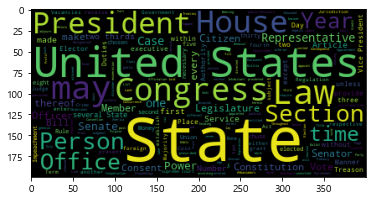

In [82]:
text = open("data/wordcloud/constitution.txt")
text = text.read()
text

wc = WordCloud().generate(text)
dir(wc)
wc.words_

plt.imshow(wc)

(-0.5, 399.5, 199.5, -0.5)

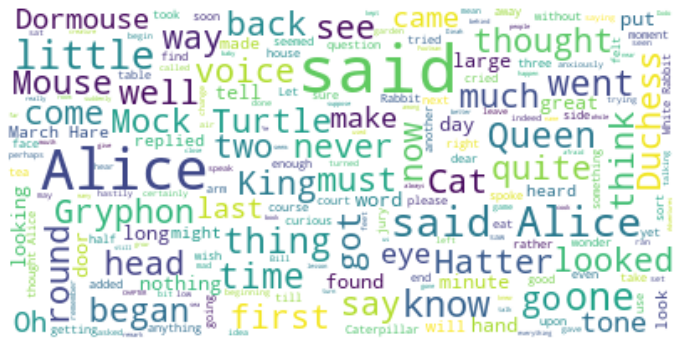

In [96]:
wc = WordCloud(max_font_size=40, background_color="white").generate(text)

plt.figure(figsize=(12, 12))
plt.imshow(wc, interpolation="bilinear") # 이미지 계단현상 보정
plt.axis("off") # 눈금 없애기 

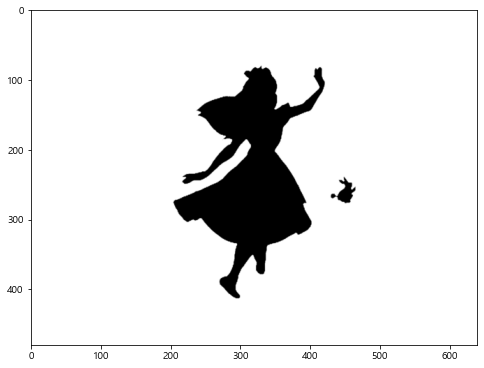

In [89]:
from PIL import Image

# 이미지를 숫자화한 배열
alice_mask = np.array(Image.open("data/wordcloud/alice_mask.png"))
plt.figure(figsize=(8, 8))
plt.imshow(alice_mask)

(-0.5, 639.5, 479.5, -0.5)

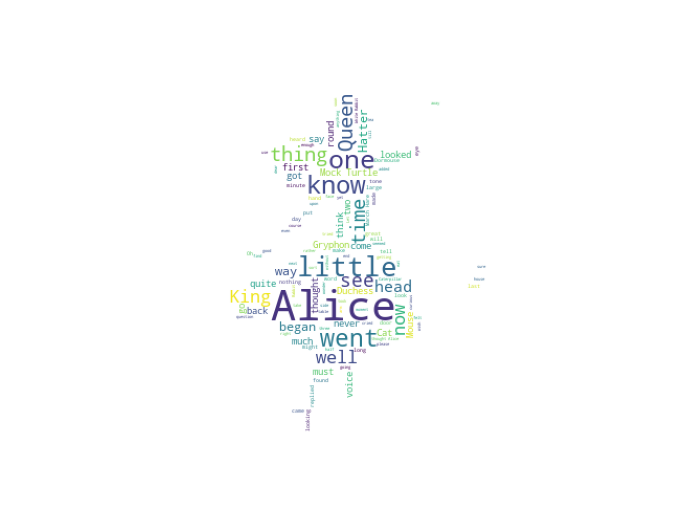

In [103]:
text = open("data/wordcloud/alice.txt").read()
text

# 불용어사전(STOPWORDS)에 said 단어를 추가
stopwords = set(STOPWORDS)
stopwords.add("said")

wc = WordCloud(max_font_size=40, background_color="white", mask=alice_mask,
              stopwords=stopwords, max_words=500).generate(text)

plt.figure(figsize=(12, 12))
plt.imshow(wc)
plt.axis("off")

In [101]:
STOPWORDS

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

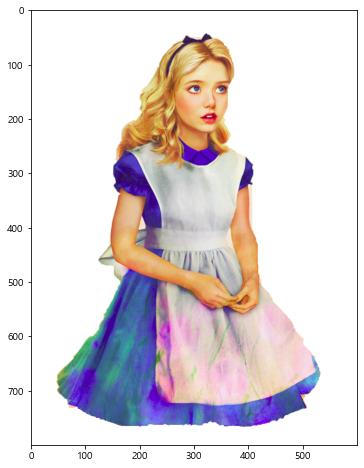

In [105]:
alice_color = np.array(Image.open("data/wordcloud/alice.png"))
plt.figure(figsize=(8, 8))
plt.imshow(alice_color)

(-0.5, 599.5, 799.5, -0.5)

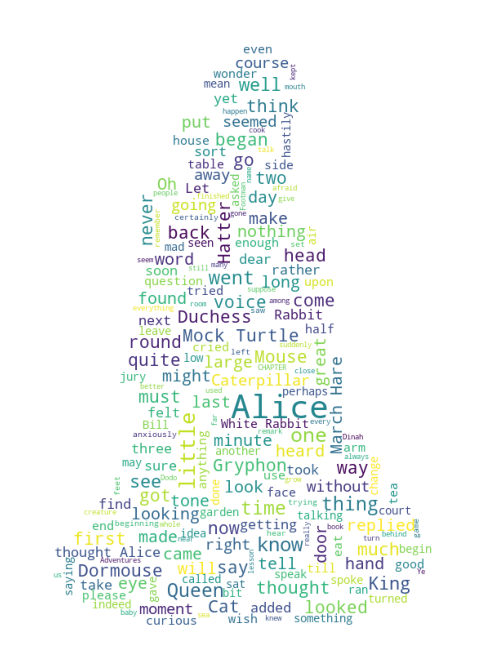

In [107]:
wc = WordCloud(max_font_size=40, background_color="white", mask=alice_color,
              stopwords=stopwords, max_words=200).generate(text)

plt.figure(figsize=(12, 12))
plt.imshow(wc)
plt.axis("off")

In [5]:
import wordcloud

wc = WordCloud(max_font_size=40, background_color="white", mask=alice_color,
              stopwords=stopwords, max_words=700).generate(text)

image_colors = wordcloud.ImageColorGenerator(alice_color)

plt.figure(figsize=(12, 12))
plt.imshow(wc.recolor(color_func=image_colors))
plt.axis("off")

NameError: name 'alice_color' is not defined

In [111]:
##### http://konlpy.org  한국어 자연어 처리 

In [6]:
import wordcloud
from konlpy.tag import Okt
from konlpy.corpus import kolaw
import nltk
from wordcloud import WordCloud

In [7]:
okt = Okt()
okt.nouns("아버지가방에들어가신다.")

['아버지', '가방']

3882
3211


(-0.5, 399.5, 199.5, -0.5)

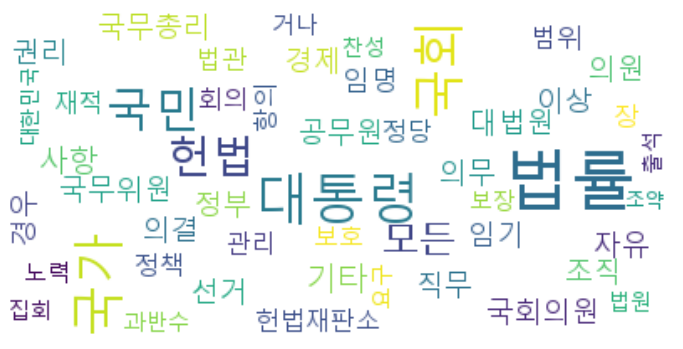

In [23]:
ko_text = kolaw.open("constitution.txt").read()
ko_text

# 형태소 분석
okt = Okt()
token_ko = okt.nouns(ko_text)
token_ko
print(len(token_ko))

# 불용어 처리
stop_words = ["제", "월", "일", "조", "때", "그", "이", "바", "및", "안", "정", "위", "관", "수"]
token_ko = [word for word in token_ko if word not in stop_words]
print(len(token_ko))

# 워드 카운팅
ko = nltk.Text(token_ko, name="대한민국 헌법")
dir(ko)
# 가장 많이 나오는 50개의 단어
data = ko.vocab().most_common(50)

wc = WordCloud(max_font_size=40, background_color="white",
              font_path="C:/Windows/Fonts/malgun.ttf").generate_from_frequencies(dict(data))

plt.figure(figsize=(12, 12))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

3378
